#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT TWEET SENTIMENT - NATURAL LANGUAGE PROCESSING WITH DISASTER TWEETS KAGGLE CASE

In [949]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords

import contractions

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

#### LOADING TRAINING AND TEST DATA

In [950]:
data_train = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Natural Language Processing with Disaster Tweets/train.csv")

data_test = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Natural Language Processing with Disaster Tweets/test.csv")

#### PRINTING DATA_TRAIN DATAFRAME

In [951]:
data_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#### PRINTING DATA_TEST DATAFRAME

In [952]:
data_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


#### CREATING DATASET WHICH WILL KEEP DATA_TRAIN AND DATA_TEST IN ORDER

In [953]:
dataset = [data_train, data_test]

#### DELETING COLUMNS WHICH DO NOT ADD ANY INFORMATION TO DATASET

In [954]:
for data in dataset:
    del data['id']
    del data['keyword']
    del data['location']

#### DATASET DUPLICATES CHECKING

In [955]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 92
Amount of duplicated observations in test dataset: 20
% of duplicated observations in train dataset: 0.012084592145015106
% of duplicated observations in test dataset: 0.006129328838492185


#### APPLYING INDEX RESET ON DATASET AFTER DROPPING DUPLICATES

In [956]:
for data in dataset:
    data.drop_duplicates(keep=False, inplace=True)
    data.reset_index(inplace = True, drop = True)

#### DATASET DUPLICATES 2ND CHECK

In [957]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### CHECKING MISSING VALUES IN DATASET

In [958]:
for data in dataset:
    print(data['text'].isnull().sum())
    print(data['text'].isna().sum())

0
0
0
0


#### PLOTTING BAR PLOT TO CHECK IMBALANCE OF DEPENDENT FEATURE

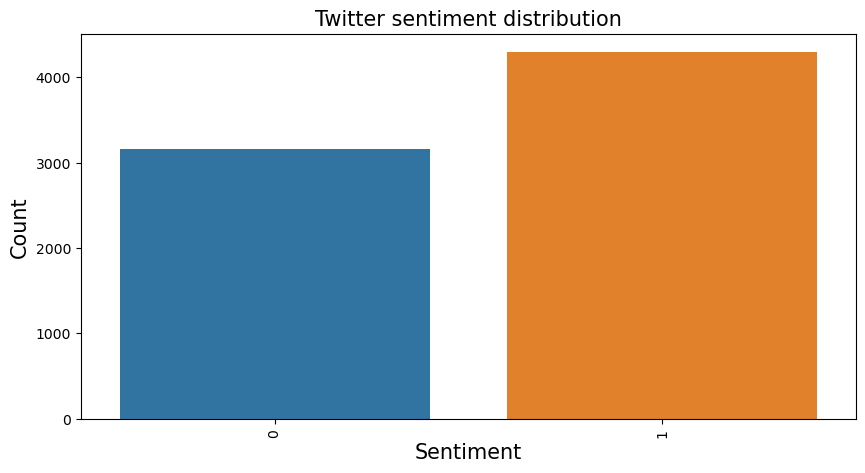

In [959]:
fig = plt.figure(figsize = (10, 5))
plt.xticks(rotation='vertical')
sns.barplot(x=data_train['target'].unique(), y=data_train['target'].value_counts())
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Twitter sentiment distribution', fontsize=15)
plt.show()

#### PLOTTING PIE PLOT TO CHECK IMBALANCE OF DEPENDENT FEATURE

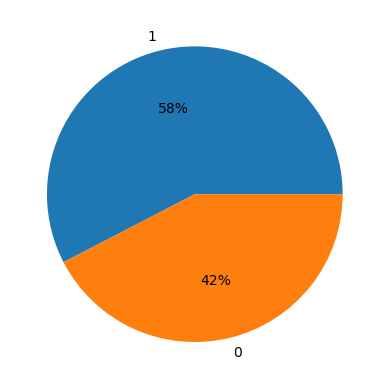

In [960]:
plt.pie(x=data_train['target'].value_counts(), labels=data_train['target'].unique(), autopct='%.0f%%')
plt.show()

#### PRINTING STOPWORDS FOR TEXT PREPROCESSING

In [961]:
nltk_stopwords = set(stopwords.words("english"))

print(nltk_stopwords)

{'more', 'themselves', 'his', 'does', 'so', 'other', 'below', 'of', 'because', 'and', 'has', 'some', 'mightn', 'itself', 'doesn', 'this', "won't", 'before', 'not', 't', 'myself', 'did', "mightn't", 'ain', 'against', 'those', 'do', 'here', 'as', 's', 'yourselves', 'between', 'haven', 'hers', "mustn't", "shouldn't", 'off', 'who', 'its', 'she', 're', 'where', 'aren', 'once', 'shan', "hasn't", "shan't", 'should', 'above', 'didn', 'was', 'wouldn', "it's", 'ourselves', 'that', 'doing', "wasn't", 'with', 'they', 'are', 'be', 'had', 'having', 'nor', 'can', 'in', 'been', "doesn't", 'whom', 'it', 'theirs', 'yours', 'which', 'very', 'by', 'he', 'these', 'again', 'them', 'd', "you'd", 'couldn', 'just', 'my', 'our', 'but', "you've", 'o', 'weren', 'when', 'him', 'wasn', 'each', 'himself', 'down', 'after', 'most', 'being', 'under', 'now', 'then', "wouldn't", 'their', 'needn', 'we', 'until', 'll', 'a', 'hadn', "aren't", 'same', "you're", 'no', 'ours', 'both', "couldn't", "haven't", 'herself', 'or', 'o

#### DEFINING CLEAN_TWEET FUNCTION TO CLEAN TWEETS

In [962]:
def clean_tweet(tweet):
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub(r'\d+', '', temp)
    temp = contractions.fix(temp) 
    temp = temp.split()
    temp = [word for word in temp if not word in nltk_stopwords]
    temp = " ".join(word for word in temp)
    return temp

#### APPLYING CLEAN_TWEET FUNCTION ON TWEETS FROM DATASET

In [963]:
for data in dataset:
    data['cleaned_tweet'] = data['text'].apply(lambda x : clean_tweet(x))

#### PRINTING DATA_TRAIN DATAFRAME WITH CLEANED_TWEET COLUMN

In [964]:
data_train

,text,target,cleaned_tweet
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders california
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke pours school
...,...,...,...
7451,#WorldNews Fallen powerlines on G:link tram: U...,1,fallen powerlines g link tram update fire crew...
7452,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...
7453,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kills saudi security site mosqu...
7454,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...


#### PRINTING DATA_TEST DATAFRAME WITH CLEANED_TWEET COLUMN

In [965]:
data_test

,text,cleaned_tweet
0,Just happened a terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",heard different cities stay safe everyone
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan
...,...,...
3219,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fasteners...
3220,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city amp others ...
3221,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3222,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo


#### DEFINING LEMMATIZE_TEXT FUNCTION TO APPLY LEMATIZING AND TOKENIZATION ON TWEETS

In [966]:
tokenizer = word_tokenize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in tokenizer(text)]

#### APPLYING LEMMATIZE_TEXT FUNCTION TO CLEANED TWEETS FROM DATASET

In [967]:
cleaned_tweet_lemmatized_train = []
cleaned_tweet_lemmatized_test = []

for sentence in data_train['cleaned_tweet']:
    cleaned_tweet_lemmatized_train.append(lemmatize_text(sentence))
    
for sentence in data_test['cleaned_tweet']:
    cleaned_tweet_lemmatized_test.append(lemmatize_text(sentence)) 

#### FILTERING AND GROUPING LEMMATIZED TOKENS FROM DATA_TRAIN TWEETS INTO LIST OF TOKENS WITH FORM SENTENCES

In [968]:
filtered_tokens_train = []

for tokenized_sentence in cleaned_tweet_lemmatized_train:
    filtered_tokens_sentence_train = []
    for token in (token for token in tokenized_sentence if len(token)>2):
        filtered_tokens_sentence_train.append(token)
    filtered_tokens_train.append(filtered_tokens_sentence_train)

print(filtered_tokens_train)
print(len(filtered_tokens_train))

[['deed', 'reason', 'may', 'allah', 'forgive'], ['forest', 'fire', 'near', 'ronge', 'sask', 'canada'], ['resident', 'asked', 'shelter', 'place', 'notified', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expected'], ['people', 'receive', 'evacuation', 'order', 'california'], ['got', 'sent', 'photo', 'ruby', 'smoke', 'pours', 'school'], ['update', 'california', 'hwy', 'closed', 'direction', 'due', 'lake', 'county', 'fire'], ['heavy', 'rain', 'cause', 'flash', 'flooding', 'street', 'manitou', 'colorado', 'spring', 'area'], ['top', 'hill', 'see', 'fire', 'wood'], ['emergency', 'evacuation', 'happening', 'building', 'across', 'street'], ['afraid', 'tornado', 'coming', 'area'], ['three', 'people', 'died', 'heat', 'wave', 'far'], ['haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'second', 'live', 'south', 'tampa', 'going', 'going', 'fvck'], ['day', 'lost', 'count'], ['bago', 'myanmar', 'arrived', 'bago'], ['damage', 'school', 'bus', 'multi', 'car', 'crash'], ['man'], ['

#### FILTERING AND GROUPING LEMMATIZED TOKENS FROM DATA_TEST TWEETS INTO LIST OF TOKENS WITH FORM SENTENCES

In [969]:
filtered_tokens_test = []

for tokenized_sentence in cleaned_tweet_lemmatized_test:
    filtered_tokens_sentence_test = []
    for token in (token for token in tokenized_sentence if len(token)>2):
        filtered_tokens_sentence_test.append(token)
    filtered_tokens_test.append(filtered_tokens_sentence_test)

print(filtered_tokens_test)
print(len(filtered_tokens_test))

[['happened', 'terrible', 'car', 'crash'], ['heard', 'different', 'city', 'stay', 'safe', 'everyone'], ['forest', 'fire', 'spot', 'pond', 'goose', 'fleeing', 'across', 'street', 'can', 'not', 'save'], ['apocalypse', 'lighting'], ['typhoon', 'soudelor', 'kill', 'china', 'taiwan'], ['shaking', 'earthquake'], ['would', 'probably', 'still', 'show', 'life', 'arsenal', 'yesterday'], ['hey'], ['nice', 'hat'], ['fuck'], ['like', 'cold'], ['nooooooooo'], ['tell'], [], ['awesome'], ['birmingham', 'wholesale', 'market', 'ablaze', 'bbc', 'news', 'fire', 'break', 'birmingham', 'wholesale', 'market'], ['wear', 'short', 'race', 'ablaze'], ['toke', 'makinwa', 'marriage', 'crisis', 'set', 'nigerian', 'twitter', 'ablaze'], ['check'], ['psa', 'splitting', 'personality', 'techie', 'follow', 'burner', 'follow'], ['beware', 'world', 'ablaze', 'sierra', 'leone', 'amp', 'guap'], ['burning', 'man', 'ablaze', 'turban', 'diva', 'via'], ['dis', 'song', 'people', 'take', 'thing', 'run', 'smh', 'eye', 'opener', 'th

#### CREATING LIST OF TOKENS FROM ALL TWEETS

In [970]:
words_train = []
for sentence in filtered_tokens_train:
    for word in sentence:
        words_train.append(word)

print(words_train[:50])
print(len(words_train))

words_test = []
for sentence in filtered_tokens_test:
    for word in sentence:
        words_test.append(word)

print(words_test[:50])
print(len(words_test))

['deed', 'reason', 'may', 'allah', 'forgive', 'forest', 'fire', 'near', 'ronge', 'sask', 'canada', 'resident', 'asked', 'shelter', 'place', 'notified', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expected', 'people', 'receive', 'evacuation', 'order', 'california', 'got', 'sent', 'photo', 'ruby', 'smoke', 'pours', 'school', 'update', 'california', 'hwy', 'closed', 'direction', 'due', 'lake', 'county', 'fire', 'heavy', 'rain', 'cause', 'flash', 'flooding', 'street', 'manitou']
59064
['happened', 'terrible', 'car', 'crash', 'heard', 'different', 'city', 'stay', 'safe', 'everyone', 'forest', 'fire', 'spot', 'pond', 'goose', 'fleeing', 'across', 'street', 'can', 'not', 'save', 'apocalypse', 'lighting', 'typhoon', 'soudelor', 'kill', 'china', 'taiwan', 'shaking', 'earthquake', 'would', 'probably', 'still', 'show', 'life', 'arsenal', 'yesterday', 'hey', 'nice', 'hat', 'fuck', 'like', 'cold', 'nooooooooo', 'tell', 'awesome', 'birmingham', 'wholesale', 'market', 'ablaze']
25734


#### PLOTTING FREQUENCY DISTRIBUTION PLOT FOR 25 MOST FREQUENT TOKENS FROM DATA_TRAIN TWEETS

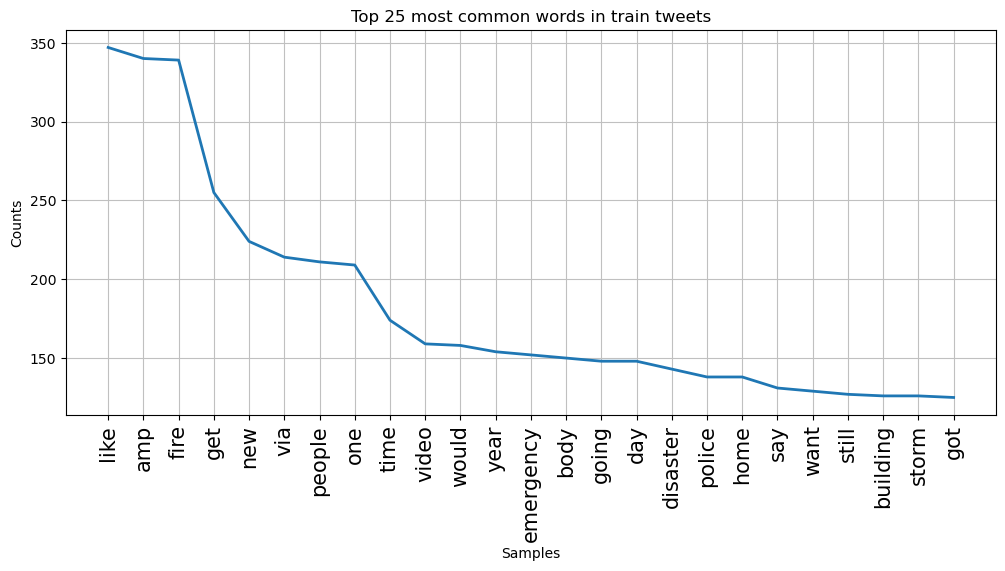

In [971]:
freq_dist = nltk.FreqDist(words_train)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words in train tweets')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

#### PLOTTING FREQUENCY DISTRIBUTION PLOT FOR 25 MOST FREQUENT TOKENS FROM DATA_TEST TWEETS

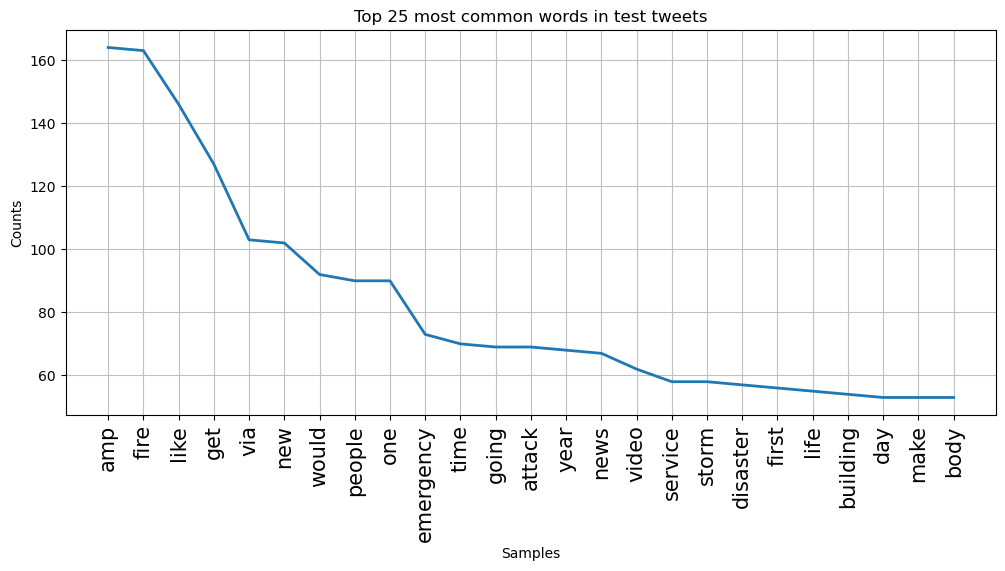

In [972]:
freq_dist = nltk.FreqDist(words_test)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words in test tweets')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

#### IMPORTING AND DEFINING WORD2VEC GLOVE MODEL TO WORD EMBEDDING

In [973]:
file_glove = 'C:/Users/Krzysiek/Desktop/Kaggle competitions/Natural Language Processing with Disaster Tweets/GloVe 6B Models/glove.6B.300d.txt'

model = KeyedVectors.load_word2vec_format(file_glove, binary=False, no_header=True)

#### DEFINING GLOVE_VECTORIZED_SENTENCE FUNCTION TO CREATE VECTORIZED SENTENCE FROM TWEET WORD EMBEDDINGS

In [974]:
def GloVe_vectorized_sentence(document):

    vectorized_sentence = []

    for tweet in document:
        vectorized_words = []
        for word in tweet.split():
            if word in model.index_to_key:
                vectorized_word = model.get_vector(word)
                vectorized_words.append(vectorized_word)
        vectorized_sentence.append(np.mean(np.array(vectorized_words), axis=0))

    return vectorized_sentence

#### APPLYING GLOVE_VECTORIZED_SENTENCE FUNCTION ON CLEANED TWEETS FROM DATASET

In [975]:
for data in dataset:
    data['vectorized_tweet'] = GloVe_vectorized_sentence(data['cleaned_tweet'])

C:\Users\Krzysiek\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Krzysiek\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Krzysiek\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Krzysiek\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


#### DEFINING EMBEDDING SIZE WHICH NEED TO BE ALLIGNED WITH GLOVE WORD2VEC MODEL

In [976]:
embedding_size = 300

#### CREATING VECTORIZED MATRIX FOR ALL TWEETS FROM DATASET

In [977]:
vectorized_tweet_matrix_train = np.empty((len(data_train['vectorized_tweet']), embedding_size))

for row in range(vectorized_tweet_matrix_train.shape[0]):
    vectorized_tweet_matrix_train[row,:] = data_train['vectorized_tweet'].iloc[row]
    
vectorized_tweet_matrix_test = np.empty((len(data_test['vectorized_tweet']), embedding_size))

for row in range(vectorized_tweet_matrix_test.shape[0]):
    vectorized_tweet_matrix_test[row,:] = data_test['vectorized_tweet'].iloc[row]    

#### JOINING VECTORIZED MATRIX BUILT ON DATA_TRAIN TWEETS WITH DEPENDENT FEATURE

In [978]:
vectorized_tweet_matrix_train = pd.concat([pd.DataFrame(vectorized_tweet_matrix_train), data_train['target']], axis= 1)

#### DROPPING MISSING VALUES FROM BOTH VECTORIZED MATRICES

In [979]:
vectorized_tweet_matrix_train = vectorized_tweet_matrix_train.dropna()
vectorized_tweet_matrix_test = pd.DataFrame(vectorized_tweet_matrix_test).dropna()

#### DEFINING X_TRAIN, Y_TRAIN AND X_TEST DATA

In [980]:
X_train = vectorized_tweet_matrix_train.drop('target', axis =1)

y_train = vectorized_tweet_matrix_train['target']

X_test = vectorized_tweet_matrix_test

#### DEFINING CROSS-VALIDATION PARAMS TO AVOID OVER-FITTING

In [981]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### DEFINING MODELS WITH HYPERPARAMETERS

In [982]:
models = [
    make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', 
                                                       solver='liblinear', 
                                                       penalty='l1', 
                                                       C=0.4, 
                                                       random_state=42)),
    make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', 
                                                       solver='liblinear', 
                                                       penalty='l2', 
                                                       C=0.4, 
                                                       random_state=42)),
    make_pipeline(StandardScaler(), svm.SVC(C=0.4)),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),  
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier()
    ]

#### TRAINING ALL MODELS ON TRAIN DATA AND PRINTING ACCURACY SCORES

In [983]:
model_name = []
score_train = []
score_test = []

for model in models:
    model.fit(X_train,y_train)
    score = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)
    model_name.append(type(model).__name__)
    score_train.append(score['train_score'].mean())
    score_test.append(score['test_score'].mean())
    print(type(model).__name__)
    print(score['train_score'].mean())
    print(score['test_score'].mean())

Pipeline
0.7956806267586903
0.7691817955328322
Pipeline
0.7963523819757802
0.7677033911768743
Pipeline
0.8599020421609052
0.8133829986207097
KNeighborsClassifier
0.8431412110817696
0.7788548820381724
DecisionTreeClassifier
0.9858591885677122
0.6940763628617027
RandomForestClassifier
0.9858591885677122
0.7885297738974703
GradientBoostingClassifier
0.8627570455496054
0.79632041783112
XGBClassifier
0.98606072810664
0.794440683290366
ExtraTreesClassifier
0.9858591885677122
0.7912151476418467
AdaBoostClassifier
0.7958150296973128
0.7584324472656109


#### PRINTING DATAFRAME WITH ALL LISTED MODELS WITH ACCURACY SCORES ON TRAIN AND TEST DATA

In [984]:
pd.concat([pd.DataFrame(model_name).rename(columns={pd.DataFrame(model_name).columns[0]: 'Model name'}), 
           pd.DataFrame(score_train).rename(columns={pd.DataFrame(score_train).columns[0]: 'Accuracy score train'}), 
           pd.DataFrame(score_test).rename(columns={pd.DataFrame(score_test).columns[0]: 'Accuracy score test'})], 
           axis=1)

,Model name,Accuracy score train,Accuracy score test
0,Pipeline,0.795681,0.769182
1,Pipeline,0.796352,0.767703
2,Pipeline,0.859902,0.813383
3,KNeighborsClassifier,0.843141,0.778855
4,DecisionTreeClassifier,0.985859,0.694076
5,RandomForestClassifier,0.985859,0.788530
6,GradientBoostingClassifier,0.862757,0.796320
7,XGBClassifier,0.986061,0.794441
8,ExtraTreesClassifier,0.985859,0.791215
9,AdaBoostClassifier,0.795815,0.758432
